## **Project Section 1**
목표: 주어진 dataset으로 지난 Trend를 확인하고 관련된 자료를 찾아 다음 분기에 어떤 게임을 설계할지 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


### **0. 데이터 전처리**

In [4]:
# [Unnamed: 0] column은 단순 index인 걸로 추정 -> 삭제
df = df.drop(labels='Unnamed: 0',axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
# 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
# 결측치 수정/삭제

# Year: 발매 연도는 알 수 없어도 지역별 장르선호도를 분석할때는 해당 row의 다른 정보들이 사용 될 수 있으므로, 
#       해당 자료를 완전히 삭제하는 것보다는 0으로 대체해주는 걸로 결정
# Genre: 같은 이름/같은 연도에 출시가 되었다면 같은 게임인걸로 가정하고, 다중의 row가 있는 해당 게임은 같은 종류의 genre로 대체
#        단, 추정이 어려운(동일 이름의 자료가 없는) 게임은 삭제하고 진행(genre가 중점으로 분석되기때문에 그 외 자료만 있는 경우 무의미하다 판단, 삭제로 결정)
#        같은 이름/다른 연도에 출시가 되었다면 이름이 같은 다른 게임일 가능성을 배제할 수 없기 때문에 genre 통일을 하지않기로 결정
# Publisher: 우리는 회사가 아닌 게임 자체에 집중하고있으므로 결측치 모두 '-'로 대체하기로 결정

In [7]:
df['Year'] = df['Year'].fillna(0)
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre          50
Publisher      58
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [8]:
df['Year'] = df['Year'].astype(int)
df['Year'].dtype

dtype('int64')

In [9]:
df['Publisher'] = df['Publisher'].fillna('-')
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre          50
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [10]:
# Genre column 결측치 게임명 확인

genre_null = df[df['Genre'].isnull()]
genre_null['Name'].unique()

array(['Ape Escape: On the Loose', 'NBA Ballers', 'NFL Street',
       'SingStar Singalong With Disney', 'Pokemon X/Pokemon Y',
       'NASCAR Racing', 'Jurassic Park III: Island Attack',
       'The Godfather: Dons Edition', 'Ski-Doo Snowmobile Challenge',
       'Batman Beyond: Return of the Joker',
       'Princess Saver! Eternal Love for My Lady', 'MVP Baseball 2004',
       'Grand Theft Auto IV', 'Brain Quest: Grades 5 & 6',
       'Dragon Ball Z: Ultimate Tenkaichi', 'Wii Party',
       'Astonishia Story', 'Chrono Cross', 'Back to the Future: The Game',
       'Medabots: Metabee', 'UFO: Trilogy',
       'Largo Winch .// Commando Sar', 'Madden NFL 11', 'Ukiyo no Shishi',
       'Myth Makers: Orbs of Doom', 'Final Fantasy XII',
       'The Mummy: Tomb of the Dragon Emperor', 'Bakemonogatari Portable',
       'Karaoke Revolution Glee: Volume 3', 'Puppy Palace', 'Yakuza 3',
       'Cloudy With a Chance of Meatballs', 'F-Zero X',
       'The History Channel: Battle for the Pacific', '

In [11]:
genre_null.isnull().sum()

Name            0
Platform        0
Year            0
Genre          50
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [12]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [13]:
fill_genre = pd.DataFrame(columns=df.columns)

fill_genre

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [14]:
genre_null_name = genre_null['Name'].unique()

for i in genre_null_name:
    new_df = df[df.Name==i]
    if len(new_df)!=1: 
        new_df = new_df.fillna(method = 'bfill')
        new_df = new_df.fillna(method = 'ffill')
        fill_genre = fill_genre.append(new_df)

fill_genre

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
408,NBA Ballers,XB,2004,Sports,Midway Games,0.37,0.11,0,0.02
3337,NBA Ballers,PS2,2004,Sports,Midway Games,0.81,0.63,0,0.21
1328,NFL Street,XB,2004,Sports,Electronic Arts,0.49,0.15,0,0.02
4953,NFL Street,PS2,2004,Sports,Electronic Arts,1.15,0.08,0,0.19
13484,NFL Street,GC,2004,Sports,Electronic Arts,0.27,0.07,0,0.01
...,...,...,...,...,...,...,...,...,...
4923,Need for Speed Underground 2,PS2,2004,Racing,Electronic Arts,2.71,3.02,0.08,1.09
5317,Need for Speed Underground 2,GBA,2004,Racing,Electronic Arts,0.31,0.12,0,0.01
8185,Need for Speed Underground 2,GC,2004,Racing,Electronic Arts,0.7,0.39,0.01,0.03
11190,Need for Speed Underground 2,PC,2004,Racing,Electronic Arts,0,0.06,0,0.01


In [15]:
fill_genre.shape[0]

68

In [16]:
fill_genre.duplicated().sum()

0

In [17]:
fill_genre.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [18]:
# 기존 df에서 Genre라 결측치 있는 row 전부 삭제 한 뒤 fill_genre를 붙이면, 
# 한 줄씩 있어서 genre 추측이 불가능했던 row들은 삭제가 되고, 나머지 같은 게임명의 genre로 채워진 row들은 남게된다.
# sort_index로 index 재정렬하여 아래에 붙은 fill_genre 에 있던 row들을 원래 위치를 찾아가게 해준다.

df.isnull().sum() # 한 번 더 체크

Name            0
Platform        0
Year            0
Genre          50
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [19]:
df.shape[0]

16598

In [20]:
df = df.dropna()
df.shape[0]

16548

In [21]:
df = pd.concat([df,fill_genre])
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4923,Need for Speed Underground 2,PS2,2004,Racing,Electronic Arts,2.71,3.02,0.08,1.09
5317,Need for Speed Underground 2,GBA,2004,Racing,Electronic Arts,0.31,0.12,0,0.01
8185,Need for Speed Underground 2,GC,2004,Racing,Electronic Arts,0.7,0.39,0.01,0.03
11190,Need for Speed Underground 2,PC,2004,Racing,Electronic Arts,0,0.06,0,0.01
16587,Need for Speed Underground 2,XB,2004,Racing,Electronic Arts,1.38,0.8,0,0.1


In [22]:
df.shape[0]

16616

In [23]:
df = df.sort_index()
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16597,The King of Fighters '95,PS,1996,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


In [24]:
# 최종 결측치 확인

df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [25]:
# 중복치 확인
# fill_genre에있던 genre가 원래 있었던 row들이 한 번 더 붙으니 duplicated 전체 삭제.

df.duplicated().sum()

49

In [26]:
df[df.duplicated()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
917,MVP Baseball 2004,GC,2004,Sports,Electronic Arts,0.2,0.05,0,0.01
1047,Skylanders Giants,3DS,2012,Action,Activision,0.12,0.01,0,0.01
1210,Back to the Future: The Game,PS3,2011,Adventure,Telltale Games,0.07,0.01,0,0.01
1497,Cars: Mater-National Championship,DS,2007,Racing,THQ,0.63,0.01,0,0.05
2561,James Bond 007: Nightfire,GC,2002,Shooter,Electronic Arts,0.6,0.16,0,0.02


In [27]:
df[df.Name == 'MVP Baseball 2004']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
917,MVP Baseball 2004,GC,2004,Sports,Electronic Arts,0.2,0.05,0,0.01
917,MVP Baseball 2004,GC,2004,Sports,Electronic Arts,0.2,0.05,0,0.01
3932,MVP Baseball 2004,PS2,2004,Sports,Electronic Arts,1.1,0.06,0,0.18
16060,MVP Baseball 2004,XB,2004,Sports,Electronic Arts,0.44,0.13,0,0.02
16060,MVP Baseball 2004,XB,2004,Sports,Electronic Arts,0.44,0.13,0,0.02


In [28]:
df = df.drop_duplicates()
df = df.reset_index(drop = True)
df.shape[0]

16567

In [29]:
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16562,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16563,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16564,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16565,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16566,The King of Fighters '95,PS,1996,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


In [30]:
# Sales 가 datatype이 float이 아닌 object로 확인됨.
# 자료 확인해보니, K, M등의 문자가 들어가있어 object로 표시됨이 확인됨.
# Sales column 데이터 확인해보니, M이 기본 단위로 추정되어, M은 공백으로 대체, K는 통상적으로 M/1000 이기때문에 해당 데이터 / 1000을 해줌
# astype 으로 데이터타입 변경동시진행.

def str_float(data):
  data_x = data
  if 'M' in data_x:
    data_x = data_x.replace('M','')
    return float(data_x)
  elif 'K' in data_x:
    data_x = float(data_x.replace('K',''))
    return data_x/1000
  else:
    return data_x

df['NA_Sales'] = df['NA_Sales'].apply(str_float).astype(float)
df['EU_Sales'] = df['EU_Sales'].apply(str_float).astype(float)
df['JP_Sales'] = df['JP_Sales'].apply(str_float).astype(float)
df['Other_Sales'] = df['Other_Sales'].apply(str_float).astype(float)

df.info() # 데이터타입 정상변경 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16567 non-null  object 
 1   Platform     16567 non-null  object 
 2   Year         16567 non-null  object 
 3   Genre        16567 non-null  object 
 4   Publisher    16567 non-null  object 
 5   NA_Sales     16567 non-null  float64
 6   EU_Sales     16567 non-null  float64
 7   JP_Sales     16567 non-null  float64
 8   Other_Sales  16567 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.1+ MB


In [31]:
# 중복치 확인 및 삭제

# Name, Platform, Year 등의 기타 자료는 동일한데 Sales가 다르게 들어가있어 전체중복검사시 발견되지 않는 자료들 확인
df[df.duplicated(subset=['Name','Platform','Year'], keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7332,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.0,0.22
8701,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.0,0.00


In [32]:
# Sales 수치로 보아 7332행이 8701행보다 현실성있는 수치를 보여주기때문에 8701행은 삭제 결정.

df.iloc[8701]

Name             Madden NFL 13
Platform                   PS3
Year                      2012
Genre                   Sports
Publisher      Electronic Arts
NA_Sales                   0.0
EU_Sales                  0.01
JP_Sales                   0.0
Other_Sales                0.0
Name: 8701, dtype: object

In [33]:
df = df.drop(8701).reset_index(drop = True)
df[df.duplicated(subset=['Name','Platform','Year'], keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [34]:
## 이상치 확인

# 각 지역 Sales column들에 들어가있는 수치들 중 이상치는 제거하거나 별도 관리한다.
# video game은 최소 1950년 이후에 나왔기때문에, Year에서 1950 밑으로 떨어지는 수치들은 0으로 바꿔준다. 
# -> (Year로는 무의미하지만 genre와 sales 등 다른 data들은 유의미하기 때문에 row를 살리는 목적)

In [35]:
# Sales column 확인

print(df.NA_Sales.describe())
print('\n')
print(df.EU_Sales.describe())
print('\n')
print(df.JP_Sales.describe())
print('\n')
print(df.Other_Sales.describe())

count    16566.000000
mean         0.264314
std          0.816313
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64


count    16566.000000
mean         0.146319
std          0.504182
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64


count    16566.000000
mean         0.077157
std          0.306544
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64


count    16566.000000
mean         0.047872
std          0.188092
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64


In [36]:
# 다른 통계치들은 음수가 있는 등의 큰 문제는 있어보이지 않지만, 모든 지역에서 75% 와 max value 사이에 너무 큰 차이의 갭이 발생된게 확인된다.
# 따라서, max value의 데이터를 확인한다.

print('NA지역 max:', df[df.NA_Sales == 41.49])
print('\n')
print('EU지역 max:', df[df.EU_Sales == 29.02])
print('\n')
print('JP지역 max:', df[df.JP_Sales == 10.22])
print('\n')
print('Other지역 max:', df[df.Other_Sales == 10.57])

NA지역 max:             Name Platform  Year   Genre Publisher  NA_Sales  EU_Sales  \
2903  Wii Sports      Wii  2006  Sports  Nintendo     41.49     29.02   

      JP_Sales  Other_Sales  
2903      3.77         8.46  


EU지역 max:             Name Platform  Year   Genre Publisher  NA_Sales  EU_Sales  \
2903  Wii Sports      Wii  2006  Sports  Nintendo     41.49     29.02   

      JP_Sales  Other_Sales  
2903      3.77         8.46  


JP지역 max:                           Name Platform  Year         Genre Publisher  \
7813  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  
7813     11.27      8.89     10.22          1.0  


Other지역 max:                                 Name Platform  Year   Genre  \
14641  Grand Theft Auto: San Andreas      PS2  2004  Action   

                  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  
14641  Take-Two Interactive      9.43       0.4      0.41        10.57  


In [37]:
# 두번째 큰 값도 데이터 확인

def second_largest_number(arr):
    second = largest = -float('inf') 
    
    for n in arr:
        if n > largest:
            second = largest
            largest = n
        elif second < n < largest:
            second = n

    return second


print('NA지역 두번째 max:', second_largest_number(df.NA_Sales))
print('EU지역 두번째 max:', second_largest_number(df.EU_Sales))
print('JP지역 두번째 max:', second_largest_number(df.JP_Sales))
print('Other지역 두번째 max', second_largest_number(df.Other_Sales))

NA지역 두번째 max: 29.08
EU지역 두번째 max: 12.88
JP지역 두번째 max: 7.2
Other지역 두번째 max 8.46


In [38]:
print('NA지역 두번째 max:', df[df.NA_Sales == 29.08])
print('\n')
print('EU지역 두번째 max:', df[df.EU_Sales == 12.88])
print('\n')
print('JP지역 두번째 max:', df[df.JP_Sales == 7.2])
print('\n')
print('Other지역 두번째 max:', df[df.Other_Sales == 8.46])

NA지역 두번째 max:                    Name Platform  Year     Genre Publisher  NA_Sales  \
4192  Super Mario Bros.      NES  1985  Platform  Nintendo     29.08   

      EU_Sales  JP_Sales  Other_Sales  
4192      3.58      6.81         0.77  


EU지역 두번째 max:                  Name Platform  Year   Genre Publisher  NA_Sales  EU_Sales  \
12554  Mario Kart Wii      Wii  2008  Racing  Nintendo     15.85     12.88   

       JP_Sales  Other_Sales  
12554      3.79         3.31  


JP지역 두번째 max:                              Name Platform  Year         Genre Publisher  \
9398  Pokemon Gold/Pokemon Silver       GB  1999  Role-Playing  Nintendo   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  
9398       9.0      6.18       7.2         0.71  


Other지역 두번째 max:             Name Platform  Year   Genre Publisher  NA_Sales  EU_Sales  \
2903  Wii Sports      Wii  2006  Sports  Nintendo     41.49     29.02   

      JP_Sales  Other_Sales  
2903      3.77         8.46  


In [39]:
# # Outlier 제거 전 순위
# NA 지역:
# 1) Wii Sports      Wii  2006  Sports
# 2) Super Mario Bros.      NES  1985  Platform

# EU 지역:
# 1) Wii Sports      Wii  2006  Sports
# 2) Mario Kart Wii      Wii  2008  Racing

# JP 지역:
# 1) Pokemon Red/Pokemon Blue       GB  1996  Role-Playing
# 2) Pokemon Gold/Pokemon Silver       GB  1999  Role-Playing

# Other 지역:
# 1) Grand Theft Auto: San Andreas      PS2  2004  Action
# 2) Wii Sports      Wii  2006  Sports

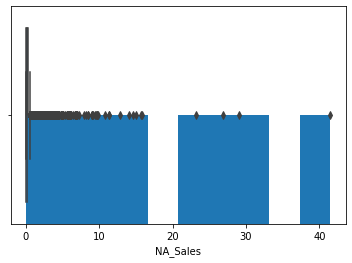

In [40]:
# NA_Sales 부터 outlier drop

plt.hist(df['NA_Sales'])
sns.boxplot(x=df['NA_Sales'])

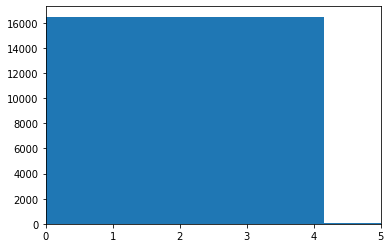

In [41]:
plt.hist(df['NA_Sales'])
plt.xlim(0,5);

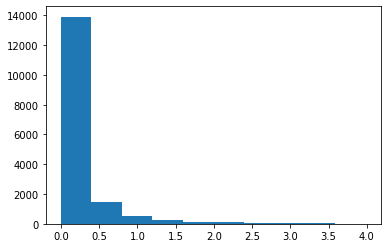

In [42]:
plt.hist(df['NA_Sales'][df['NA_Sales']<4]);

In [43]:
less_4 = df[df['NA_Sales']<4]
larger_4 = df[df['NA_Sales']>=4]

len(larger_4) / len(less_4)

0.0053404539385847796

In [44]:
df_NA_out = df[df['NA_Sales']>=4]
df_NA_out.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
121,Call of Duty 4: Modern Warfare,X360,2007,Shooter,Activision,5.91,2.38,0.13,0.90
222,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05,3.15,0.00,1.07
576,Mario Kart 64,N64,1996,Racing,Nintendo,5.55,1.94,2.23,0.15
1004,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16
1121,Half-Life,PC,1997,Shooter,Vivendi Games,4.03,0.00,0.09,0.00


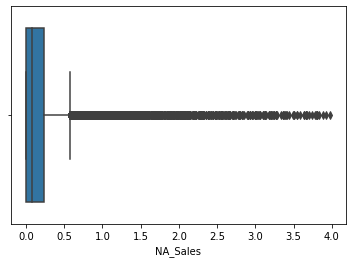

In [45]:
df = df.drop(index=df[df['NA_Sales']>=4].index)
sns.boxplot(x=df['NA_Sales']);

In [46]:
# 위 box plot에서 더이상 빼야될 데이터 확인되지않음.
# 따라서 고정

df['NA_Sales'].describe()

count    16478.000000
mean         0.223835
std          0.424155
min          0.000000
25%          0.000000
50%          0.080000
75%          0.230000
max          3.980000
Name: NA_Sales, dtype: float64

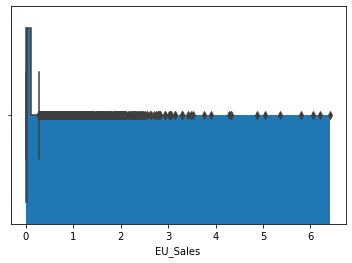

In [47]:
# 동일 과정 반복 : EU_Sales

plt.hist(df['EU_Sales'])
sns.boxplot(x=df['EU_Sales']);

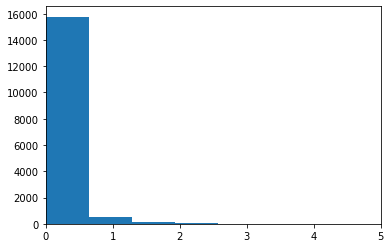

In [48]:
plt.hist(df['EU_Sales'])
plt.xlim(0,5);

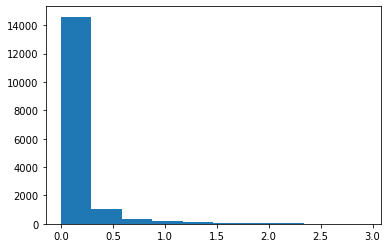

In [49]:
plt.hist(df['EU_Sales'][df['EU_Sales']<3]);

In [50]:
less_3 = df[df['EU_Sales']<3]
larger_3 = df[df['EU_Sales']>=3]

len(larger_3) / len(less_3)

0.0013977514433302948

In [51]:
df_EU_out = df[df['EU_Sales']>=3]
df_EU_out.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
510,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18
2005,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02
2634,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26
2718,FIFA 14,PS3,2013,Sports,Electronic Arts,0.78,4.32,0.07,1.73
3019,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23


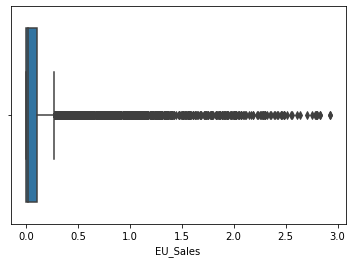

In [52]:
df = df.drop(index=df[df['EU_Sales']>=3].index)
sns.boxplot(x=df['EU_Sales']);

In [53]:
# 위 box plot에서 더이상 빼야될 데이터 확인되지않음.
# 따라서 고정

df['EU_Sales'].describe()

count    16455.000000
mean         0.120122
std          0.272656
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max          2.930000
Name: EU_Sales, dtype: float64

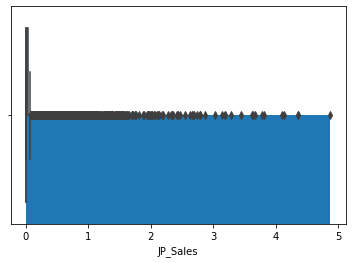

In [54]:
# 동일 과정 반복 : JP_Sales

plt.hist(df['JP_Sales'])
sns.boxplot(x=df['JP_Sales']);

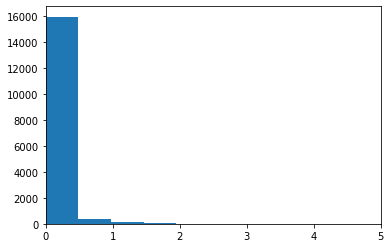

In [55]:
plt.hist(df['JP_Sales'])
plt.xlim(0,5);

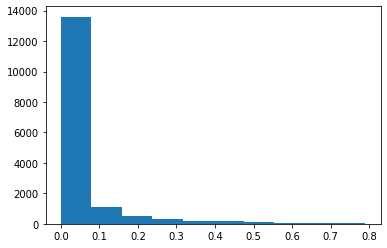

In [56]:
plt.hist(df['JP_Sales'][df['JP_Sales']<0.8]);

In [57]:
less_1_5 = df[df['JP_Sales']<1.5]
larger_1_5 = df[df['JP_Sales']>=1.5]

len(larger_1_5) / len(less_1_5)

0.004701428745878617

In [58]:
df_JP_out = df[df['JP_Sales']>=1.5]
df_JP_out.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
162,Dragon Quest VII: Warriors of Eden,PS,2000,Role-Playing,Enix Corporation,0.20,0.14,4.10,0.02
261,Monster Hunter Tri,3DS,2011,Role-Playing,Nintendo,0.46,0.29,1.96,0.07
465,Baseball,NES,1983,Sports,Nintendo,0.73,0.10,2.35,0.02
536,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,Nintendo,0.67,0.49,2.62,0.11
1107,Donkey Kong Country 3: Dixie Kong's Double Tro...,SNES,1996,Platform,Nintendo,1.17,0.50,1.75,0.08


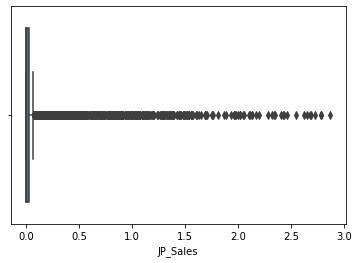

In [59]:
df = df.drop(index=df[df['JP_Sales']>=3].index)
sns.boxplot(x=df['JP_Sales']);

In [60]:
# 위 box plot에서 더이상 빼야될 데이터 확인되지않음.
# 따라서 고정

df['JP_Sales'].describe()

count    16439.000000
mean         0.063731
std          0.197961
min          0.000000
25%          0.000000
50%          0.000000
75%          0.030000
max          2.870000
Name: JP_Sales, dtype: float64

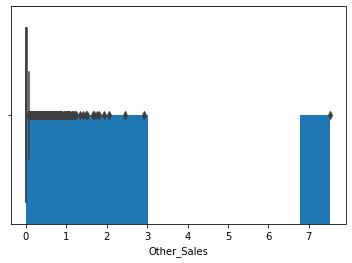

In [61]:
# 동일 과정 반복 : Other_Sales

plt.hist(df['Other_Sales'])
sns.boxplot(x=df['Other_Sales']);

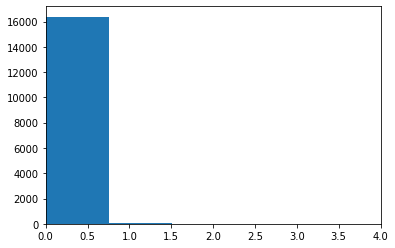

In [62]:
plt.hist(df['Other_Sales'])
plt.xlim(0,4);

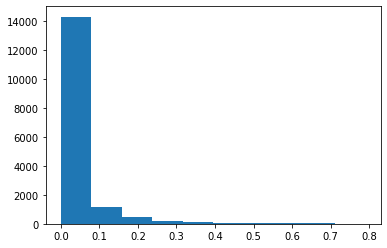

In [63]:
plt.hist(df['Other_Sales'][df['Other_Sales']<0.8]);

In [64]:
less_08 = df[df['Other_Sales']<0.8]
larger_08 = df[df['JP_Sales']>=0.8]

len(larger_08) / len(less_08)

0.015804247010007322

In [65]:
df_Other_out = df[df['Other_Sales']>=0.8]
df_Other_out.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
603,Dragon Ball Z: Budokai Tenkaichi 3,PS2,2007,Fighting,Atari,1.15,0.00,0.76,1.09
760,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75
846,FIFA Soccer 08,PS2,2007,Sports,Electronic Arts,0.68,0.00,0.00,2.46
1627,Assassin's Creed III,PS3,2012,Action,Ubisoft,2.64,2.56,0.16,1.14
2429,Pokémon Crystal Version,GB,2000,Role-Playing,Nintendo,2.55,1.56,1.29,0.99


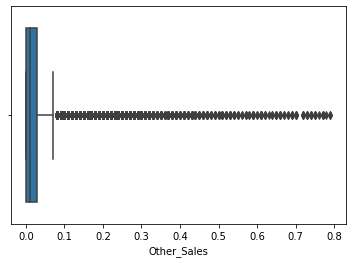

In [66]:
df = df.drop(index=df[df['Other_Sales']>=0.8].index)
sns.boxplot(x=df['Other_Sales']);

In [67]:
# 위 box plot에서 더이상 빼야될 데이터 확인되지않음.
# 따라서 고정

df['Other_Sales'].describe()

count    16388.000000
mean         0.036128
std          0.077653
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max          0.790000
Name: Other_Sales, dtype: float64

In [68]:
df = df.reset_index(drop=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [69]:
##### 급변하는 게임 시장에서 2000년도 이전 자료는 우리가 "앞으로 설계해야할 게임"을 위해 트렌드를 조사하기에 유의미하지 않다고 판단
# Year에서 2000년 이후(2000년 포함)의 자료들만 포함

df = df[df['Year']>=2000]
df = df.reset_index(drop=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [70]:
df[df['Year'] == 2020]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5904,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.0,0.02


In [71]:
#2020 년도에 출시된 게임은 1개밖에 없으므로, 이 역시 트렌드 추이를 보기에는 유의미한 가치가 없음, 삭제

df = df[df['Year']<2020]
df = df.reset_index(drop = True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


## [ 지역별 선호장르 조사 ]
1. 지역은 NA / EU / JP / OTHER로 나누어 조사
2. 지역별로 선호하는 장르가 있는지 확인


In [72]:
# NA 지역 장르 선호 순위(순위를 위해 sort_values로 Sales값이 큰 것부터 내림차순)

NA_Genre = df['NA_Sales'].groupby(df['Genre'])
NA_Genre = pd.DataFrame(NA_Genre.sum())
NA_Genre = NA_Genre.sort_values(by='NA_Sales', ascending = False).reset_index()
NA_Genre.head()

,Genre,NA_Sales
0,Action,650.32
1,Sports,495.21
2,Shooter,320.36
3,Misc,295.21
4,Role-Playing,226.34


In [73]:
# 시각화를 위한 ratio column(%) 추가, 비율이 잘 쪼개졌는지 확인하기 위해 대략적으로 sum이 100이 나오는지 확인

NA_Genre['NA_Sales_ratio'] = round(NA_Genre['NA_Sales'].div(NA_Genre['NA_Sales'].sum())*100,2)
print('ratio sum:',NA_Genre['NA_Sales_ratio'].sum())
print(NA_Genre.head())

ratio sum: 100.00999999999999
          Genre  NA_Sales  NA_Sales_ratio
0        Action    650.32           22.53
1        Sports    495.21           17.15
2       Shooter    320.36           11.10
3          Misc    295.21           10.23
4  Role-Playing    226.34            7.84


In [74]:
# 전체적인 선호도 보다는 TOP 5로 추려서 시각화

NA_Genre_5 = NA_Genre.head(5)
NA_Genre_5

,Genre,NA_Sales,NA_Sales_ratio
0,Action,650.32,22.53
1,Sports,495.21,17.15
2,Shooter,320.36,11.10
3,Misc,295.21,10.23
4,Role-Playing,226.34,7.84


In [75]:
# EU, JP, Other 에도 동일적용

EU_Genre = df['EU_Sales'].groupby(df['Genre'])
EU_Genre = pd.DataFrame(EU_Genre.sum())
EU_Genre = EU_Genre.sort_values(by='EU_Sales', ascending = False).reset_index()
print(EU_Genre.head())

JP_Genre = df['JP_Sales'].groupby(df['Genre'])
JP_Genre = pd.DataFrame(JP_Genre.sum())
JP_Genre = JP_Genre.sort_values(by='JP_Sales', ascending = False).reset_index()
print(JP_Genre.head())

Other_Genre = df['Other_Sales'].groupby(df['Genre'])
Other_Genre = pd.DataFrame(Other_Genre.sum())
Other_Genre = Other_Genre.sort_values(by='Other_Sales', ascending = False).reset_index()
print(Other_Genre.head())

     Genre  EU_Sales
0   Action    395.75
1   Sports    240.35
2  Shooter    194.75
3     Misc    151.54
4   Racing    149.43
          Genre  JP_Sales
0  Role-Playing    175.01
1        Action    117.48
2          Misc     68.90
3        Sports     59.08
4      Fighting     39.49
     Genre  Other_Sales
0   Action       133.41
1   Sports        86.53
2  Shooter        63.90
3     Misc        52.63
4   Racing        47.18


In [76]:
EU_Genre['EU_Sales_ratio'] = round(EU_Genre['EU_Sales'].div(EU_Genre['EU_Sales'].sum())*100,2)
print('ratio sum:',EU_Genre['EU_Sales_ratio'].sum())
print(EU_Genre.head())

JP_Genre['JP_Sales_ratio'] = round(JP_Genre['JP_Sales'].div(JP_Genre['JP_Sales'].sum())*100,2)
print('ratio sum:',JP_Genre['JP_Sales_ratio'].sum())
print(JP_Genre.head())

Other_Genre['Other_Sales_ratio'] = round(Other_Genre['Other_Sales'].div(Other_Genre['Other_Sales'].sum())*100,2)
print('ratio sum:',Other_Genre['Other_Sales_ratio'].sum())
print(Other_Genre.head())

ratio sum: 100.0
     Genre  EU_Sales  EU_Sales_ratio
0   Action    395.75           24.48
1   Sports    240.35           14.87
2  Shooter    194.75           12.05
3     Misc    151.54            9.38
4   Racing    149.43            9.24
ratio sum: 100.00999999999999
          Genre  JP_Sales  JP_Sales_ratio
0  Role-Playing    175.01           27.56
1        Action    117.48           18.50
2          Misc     68.90           10.85
3        Sports     59.08            9.30
4      Fighting     39.49            6.22
ratio sum: 100.0
     Genre  Other_Sales  Other_Sales_ratio
0   Action       133.41              24.80
1   Sports        86.53              16.08
2  Shooter        63.90              11.88
3     Misc        52.63               9.78
4   Racing        47.18               8.77


In [77]:
EU_Genre_5 = EU_Genre.head(5)
print(EU_Genre_5)

JP_Genre_5 = JP_Genre.head(5)
print(JP_Genre_5)

Other_Genre_5 = Other_Genre.head(5)
print(Other_Genre_5)

     Genre  EU_Sales  EU_Sales_ratio
0   Action    395.75           24.48
1   Sports    240.35           14.87
2  Shooter    194.75           12.05
3     Misc    151.54            9.38
4   Racing    149.43            9.24
          Genre  JP_Sales  JP_Sales_ratio
0  Role-Playing    175.01           27.56
1        Action    117.48           18.50
2          Misc     68.90           10.85
3        Sports     59.08            9.30
4      Fighting     39.49            6.22
     Genre  Other_Sales  Other_Sales_ratio
0   Action       133.41              24.80
1   Sports        86.53              16.08
2  Shooter        63.90              11.88
3     Misc        52.63               9.78
4   Racing        47.18               8.77


In [78]:
# 지역별 장르선호도 시각화

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontc

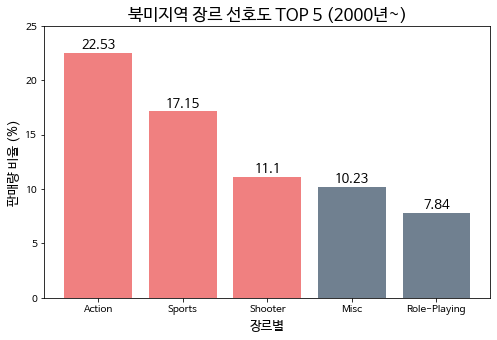

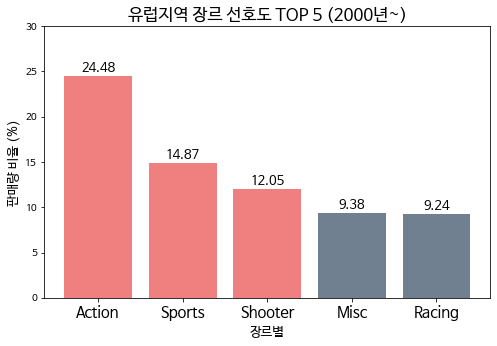

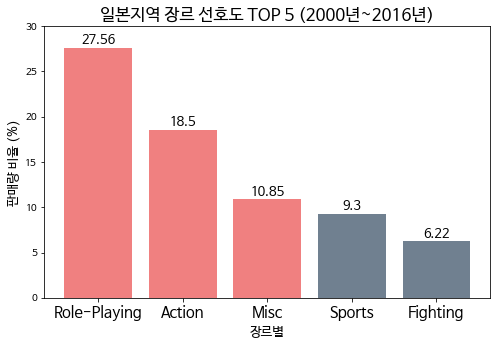

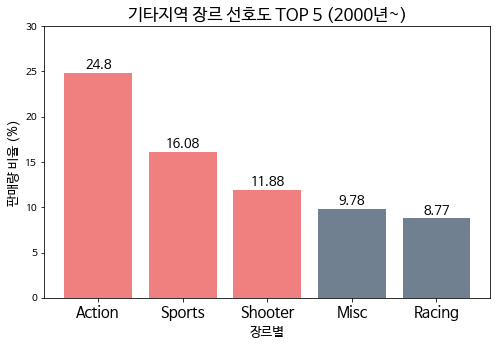

In [79]:
plt.rc('font', family='NAnumBarunGothic')

# 북미지역 장르선호도 bar graph
fig, ax = plt.subplots(figsize=(8,5))
bar_width = 0.1
plt.bar(NA_Genre_5['Genre'], NA_Genre_5['NA_Sales_ratio'], color = ['lightcoral','lightcoral','lightcoral','slategrey','slategrey'])
plt.title("북미지역 장르 선호도 TOP 5 (2000년~)",fontsize = 17)
plt.xlabel('장르별',fontsize = 13)
plt.ylabel('판매량 비율 (%)',fontsize = 13)
for i, v in enumerate(NA_Genre_5['Genre']):
    plt.text(v, NA_Genre_5['NA_Sales_ratio'][i], NA_Genre_5['NA_Sales_ratio'][i], 
             fontsize = 13, 
             color='black',
             horizontalalignment='center', 
             verticalalignment='bottom') 
plt.ylim(0,25)
plt.rc('xtick', labelsize=15)
plt.show()

# 유럽지역 장르선호도 bar graph

fig, ax = plt.subplots(figsize=(8,5))
bar_width = 0.1
plt.bar(EU_Genre_5['Genre'], EU_Genre_5['EU_Sales_ratio'], color = ['lightcoral','lightcoral','lightcoral','slategrey','slategrey'])
plt.title("유럽지역 장르 선호도 TOP 5 (2000년~)",fontsize = 17)
plt.xlabel('장르별',fontsize = 13)
plt.ylabel('판매량 비율 (%)',fontsize = 13)
for i, v in enumerate(EU_Genre_5['Genre']):
    plt.text(v, EU_Genre_5['EU_Sales_ratio'][i], EU_Genre_5['EU_Sales_ratio'][i], 
             fontsize = 13, 
             color='black',
             horizontalalignment='center', 
             verticalalignment='bottom') 
plt.ylim(0,30)
plt.rc('xtick', labelsize=15)
plt.show()

# 일본지역 장르선호도 bar graph

fig, ax = plt.subplots(figsize=(8,5))
bar_width = 0.1
plt.bar(JP_Genre_5['Genre'], JP_Genre_5['JP_Sales_ratio'], color = ['lightcoral','lightcoral','lightcoral','slategrey','slategrey'])
plt.title("일본지역 장르 선호도 TOP 5 (2000년~2016년)",fontsize = 17)
plt.xlabel('장르별',fontsize = 13)
plt.ylabel('판매량 비율 (%)',fontsize = 13)
for i, v in enumerate(JP_Genre_5['Genre']):
    plt.text(v, JP_Genre_5['JP_Sales_ratio'][i], JP_Genre_5['JP_Sales_ratio'][i], 
             fontsize = 13, 
             color='black',
             horizontalalignment='center', 
             verticalalignment='bottom') 
plt.ylim(0,30)
plt.rc('xtick', labelsize=15)
plt.show()

# 기타지역 장르선호도 bar graph

fig, ax = plt.subplots(figsize=(8,5))
bar_width = 0.1
plt.bar(Other_Genre_5['Genre'], Other_Genre_5['Other_Sales_ratio'], color = ['lightcoral','lightcoral','lightcoral','slategrey','slategrey'])
plt.title("기타지역 장르 선호도 TOP 5 (2000년~)",fontsize = 17)
plt.xlabel('장르별',fontsize = 13)
plt.ylabel('판매량 비율 (%)',fontsize = 13)
for i, v in enumerate(Other_Genre_5['Genre']):
    plt.text(v, Other_Genre_5['Other_Sales_ratio'][i], Other_Genre_5['Other_Sales_ratio'][i], 
             fontsize = 13, 
             color='black',
             horizontalalignment='center', 
             verticalalignment='bottom') 
plt.ylim(0,30)
plt.rc('xtick', labelsize=15)
plt.show()

북미지역과 유럽지역, 기타지역은 TOP5중 4가지가 비슷한 비율로 순위가 일치함을 확인함.

일본지역의 경우는 가설검정없이도, 다른 지역과는 완연히 다르게 롤플레잉 장르가 압도적인 1위를 보임.
이는 RPG 쯔꾸르 등 일본의 롤플레잉 게임 문화가 상당히 잘 발달한 케이스때문으로 보여짐.


## [ 연도별 선호장르 조사 ]
1. 연도별로 선호하는 장르가 있는지 확인
2. 연도별로 선호하는 플랫폼이 있는지 확인


In [80]:
## 연도별로 정리하기위한 데이터 전처리
df['Year'].value_counts().head(20)

2009    1404
2008    1399
2010    1241
2007    1177
2011    1116
2006     991
2005     927
2002     820
2003     763
2004     749
2012     643
2015     602
2014     571
2013     535
2001     473
2000     344
2016     338
2017       3
Name: Year, dtype: int64

In [81]:
#2017년도 데이터는 3개밖에 포함되지않으므로, "연도별" 장르선호도를 보기에는 샘플이 충분하지 않음. 따라서 삭제진행.

df_Year = df[df['Year']!=2017]
df_Year[df_Year['Year']==2017]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [82]:
df_Year = df_Year.reset_index(drop=True)

In [83]:
# Sales total 확인
Yr_Genre = df_Year
Yr_Genre['Sales_Total'] = Yr_Genre['NA_Sales'] + Yr_Genre['EU_Sales'] + Yr_Genre['JP_Sales'] + Yr_Genre['Other_Sales']
Yr_Genre.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [84]:
## 연도별로 선호하는 장르 찾기

Yr_Genre = Yr_Genre['Sales_Total'].groupby([Yr_Genre['Year'],Yr_Genre['Genre']])
Yr_Genre = pd.DataFrame(Yr_Genre.sum()).reset_index()
Yr_Genre.head()

,Year,Genre,Sales_Total
0,2000,Action,33.98
1,2000,Adventure,2.96
2,2000,Fighting,20.26
3,2000,Misc,15.55
4,2000,Platform,15.96


In [85]:
Yr_Genre['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016])

In [86]:
Yr_Genre_2000 = Yr_Genre[Yr_Genre['Year']==2000]
Yr_Genre_2000

,Year,Genre,Sales_Total
0,2000,Action,33.98
1,2000,Adventure,2.96
2,2000,Fighting,20.26
3,2000,Misc,15.55
4,2000,Platform,15.96
5,2000,Puzzle,3.83
6,2000,Racing,20.00
7,2000,Role-Playing,18.19
8,2000,Shooter,6.81
9,2000,Simulation,3.37


In [87]:
Yr_Genre_2000['Sales_Total_Ratio'] = round(Yr_Genre_2000['Sales_Total'].div(Yr_Genre_2000['Sales_Total'].sum())*100,2)
print(Yr_Genre_2000)
print('ratio sum:',Yr_Genre_2000.Sales_Total_Ratio.sum())

    Year         Genre  Sales_Total  Sales_Total_Ratio
0   2000        Action        33.98              17.84
1   2000     Adventure         2.96               1.55
2   2000      Fighting        20.26              10.64
3   2000          Misc        15.55               8.16
4   2000      Platform        15.96               8.38
5   2000        Puzzle         3.83               2.01
6   2000        Racing        20.00              10.50
7   2000  Role-Playing        18.19               9.55
8   2000       Shooter         6.81               3.58
9   2000    Simulation         3.37               1.77
10  2000        Sports        41.24              21.65
11  2000      Strategy         8.32               4.37
ratio sum: 100.0


<ipython-input-87-29f4310938f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yr_Genre_2000['Sales_Total_Ratio'] = round(Yr_Genre_2000['Sales_Total'].div(Yr_Genre_2000['Sales_Total'].sum())*100,2)


In [88]:
Yr_Genre_2001 = Yr_Genre[Yr_Genre['Year']==2001]
Yr_Genre_2001['Sales_Total_Ratio'] = round(Yr_Genre_2001['Sales_Total'].div(Yr_Genre_2001['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2001.Sales_Total_Ratio.sum())

Yr_Genre_2002 = Yr_Genre[Yr_Genre['Year']==2002]
Yr_Genre_2002['Sales_Total_Ratio'] = round(Yr_Genre_2002['Sales_Total'].div(Yr_Genre_2002['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2002.Sales_Total_Ratio.sum())

Yr_Genre_2003 = Yr_Genre[Yr_Genre['Year']==2003]
Yr_Genre_2003['Sales_Total_Ratio'] = round(Yr_Genre_2003['Sales_Total'].div(Yr_Genre_2003['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2003.Sales_Total_Ratio.sum())

Yr_Genre_2004 = Yr_Genre[Yr_Genre['Year']==2004]
Yr_Genre_2004['Sales_Total_Ratio'] = round(Yr_Genre_2004['Sales_Total'].div(Yr_Genre_2004['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2004.Sales_Total_Ratio.sum())

Yr_Genre_2005 = Yr_Genre[Yr_Genre['Year']==2005]
Yr_Genre_2005['Sales_Total_Ratio'] = round(Yr_Genre_2005['Sales_Total'].div(Yr_Genre_2005['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2005.Sales_Total_Ratio.sum())

Yr_Genre_2006 = Yr_Genre[Yr_Genre['Year']==2006]
Yr_Genre_2006['Sales_Total_Ratio'] = round(Yr_Genre_2006['Sales_Total'].div(Yr_Genre_2006['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2006.Sales_Total_Ratio.sum())

Yr_Genre_2007 = Yr_Genre[Yr_Genre['Year']==2007]
Yr_Genre_2007['Sales_Total_Ratio'] = round(Yr_Genre_2007['Sales_Total'].div(Yr_Genre_2007['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2007.Sales_Total_Ratio.sum())

Yr_Genre_2008 = Yr_Genre[Yr_Genre['Year']==2008]
Yr_Genre_2008['Sales_Total_Ratio'] = round(Yr_Genre_2008['Sales_Total'].div(Yr_Genre_2008['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2008.Sales_Total_Ratio.sum())

Yr_Genre_2009 = Yr_Genre[Yr_Genre['Year']==2009]
Yr_Genre_2009['Sales_Total_Ratio'] = round(Yr_Genre_2009['Sales_Total'].div(Yr_Genre_2009['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2009.Sales_Total_Ratio.sum())

Yr_Genre_2010 = Yr_Genre[Yr_Genre['Year']==2010]
Yr_Genre_2010['Sales_Total_Ratio'] = round(Yr_Genre_2010['Sales_Total'].div(Yr_Genre_2010['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2010.Sales_Total_Ratio.sum())

Yr_Genre_2011 = Yr_Genre[Yr_Genre['Year']==2011]
Yr_Genre_2011['Sales_Total_Ratio'] = round(Yr_Genre_2011['Sales_Total'].div(Yr_Genre_2011['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2011.Sales_Total_Ratio.sum())

Yr_Genre_2012 = Yr_Genre[Yr_Genre['Year']==2012]
Yr_Genre_2012['Sales_Total_Ratio'] = round(Yr_Genre_2012['Sales_Total'].div(Yr_Genre_2012['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2012.Sales_Total_Ratio.sum())

Yr_Genre_2013 = Yr_Genre[Yr_Genre['Year']==2013]
Yr_Genre_2013['Sales_Total_Ratio'] = round(Yr_Genre_2013['Sales_Total'].div(Yr_Genre_2013['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2013.Sales_Total_Ratio.sum())

Yr_Genre_2014 = Yr_Genre[Yr_Genre['Year']==2014]
Yr_Genre_2014['Sales_Total_Ratio'] = round(Yr_Genre_2014['Sales_Total'].div(Yr_Genre_2014['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2014.Sales_Total_Ratio.sum())

Yr_Genre_2015 = Yr_Genre[Yr_Genre['Year']==2015]
Yr_Genre_2015['Sales_Total_Ratio'] = round(Yr_Genre_2015['Sales_Total'].div(Yr_Genre_2015['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2015.Sales_Total_Ratio.sum())

Yr_Genre_2016 = Yr_Genre[Yr_Genre['Year']==2016]
Yr_Genre_2016['Sales_Total_Ratio'] = round(Yr_Genre_2016['Sales_Total'].div(Yr_Genre_2016['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_Genre_2016.Sales_Total_Ratio.sum())

ratio sum: 100.0
ratio sum: 100.01
ratio sum: 100.00000000000001
ratio sum: 100.0
ratio sum: 99.99
ratio sum: 100.01
ratio sum: 100.02
ratio sum: 100.0
ratio sum: 99.97999999999999
ratio sum: 99.99
ratio sum: 99.99000000000001
ratio sum: 100.0
ratio sum: 99.99999999999999
ratio sum: 100.0
ratio sum: 100.02000000000001
ratio sum: 100.0


<ipython-input-88-07236d3cea5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yr_Genre_2001['Sales_Total_Ratio'] = round(Yr_Genre_2001['Sales_Total'].div(Yr_Genre_2001['Sales_Total'].sum())*100,2)
<ipython-input-88-07236d3cea5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yr_Genre_2002['Sales_Total_Ratio'] = round(Yr_Genre_2002['Sales_Total'].div(Yr_Genre_2002['Sales_Total'].sum())*100,2)
<ipython-input-88-07236d3cea5d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [89]:
Yr_ratio_list = [Yr_Genre_2000, Yr_Genre_2001, Yr_Genre_2002, Yr_Genre_2003, Yr_Genre_2004, Yr_Genre_2005, Yr_Genre_2006, Yr_Genre_2007, Yr_Genre_2008, Yr_Genre_2009, Yr_Genre_2010, Yr_Genre_2011, Yr_Genre_2012, Yr_Genre_2013, Yr_Genre_2014, Yr_Genre_2015, Yr_Genre_2016]
Yr_Genre_ratio = pd.concat(Yr_ratio_list)
Yr_Genre_ratio

,Year,Genre,Sales_Total,Sales_Total_Ratio
0,2000,Action,33.98,17.84
1,2000,Adventure,2.96,1.55
2,2000,Fighting,20.26,10.64
3,2000,Misc,15.55,8.16
4,2000,Platform,15.96,8.38
...,...,...,...,...
198,2016,Role-Playing,6.75,10.96
199,2016,Shooter,13.97,22.68
200,2016,Simulation,0.39,0.63
201,2016,Sports,9.68,15.71


In [90]:
Yr_Genre_ratio.Genre.unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [91]:
Yr_Action = Yr_Genre_ratio[Yr_Genre_ratio['Genre']=='Action']
Yr_Adventure = Yr_Genre_ratio[Yr_Genre_ratio['Genre']=='Adventure']
Yr_Fighting = Yr_Genre_ratio[Yr_Genre_ratio['Genre']=='Fighting']
Yr_Misc = Yr_Genre_ratio[Yr_Genre_ratio['Genre']=='Misc']
Yr_Platform = Yr_Genre_ratio[Yr_Genre_ratio['Genre']=='Platform']
Yr_Puzzle = Yr_Genre_ratio[Yr_Genre_ratio['Genre']=='Puzzle']
Yr_Racing = Yr_Genre_ratio[Yr_Genre_ratio['Genre']=='Racing']
Yr_RolePlaying = Yr_Genre_ratio[Yr_Genre_ratio['Genre']=='Role-Playing']
Yr_Shooter = Yr_Genre_ratio[Yr_Genre_ratio['Genre']=='Shooter']
Yr_Simulation = Yr_Genre_ratio[Yr_Genre_ratio['Genre']=='Simulation']
Yr_Sports = Yr_Genre_ratio[Yr_Genre_ratio['Genre']=='Sports']
Yr_Strategy = Yr_Genre_ratio[Yr_Genre_ratio['Genre']=='Strategy']

In [92]:
set(Yr_Action.Year.unique()) == set(Yr_Genre_ratio.Year.unique())

True

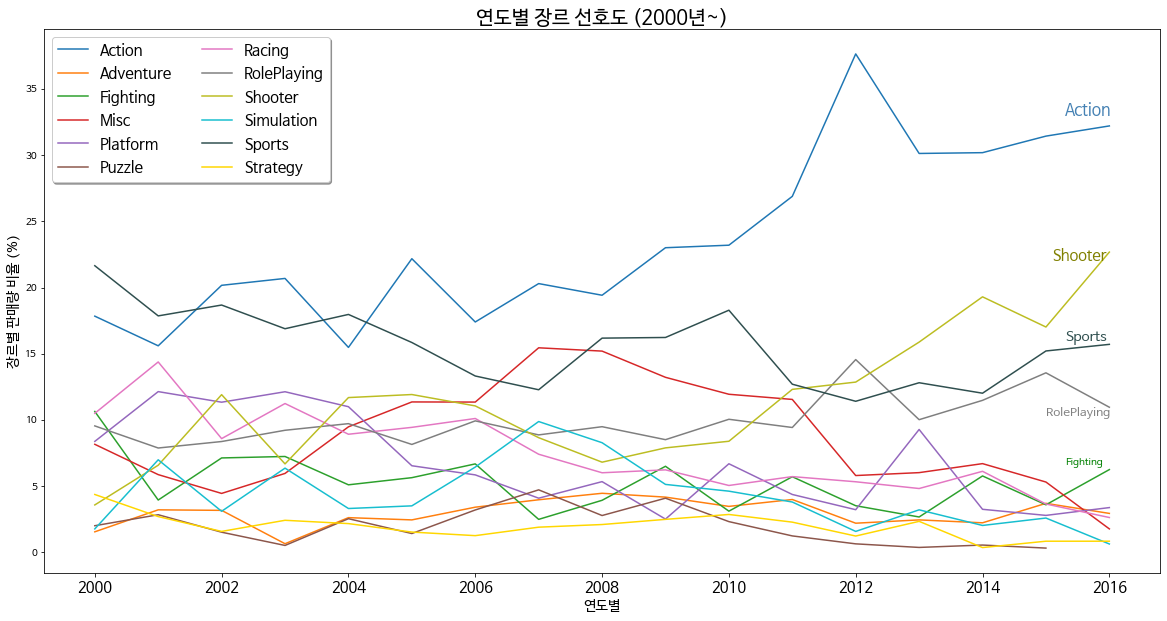

In [93]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(Yr_Action['Year'],Yr_Action['Sales_Total_Ratio'], label='Action')
plt.plot(Yr_Adventure['Year'],Yr_Adventure['Sales_Total_Ratio'], label='Adventure')
plt.plot(Yr_Fighting['Year'],Yr_Fighting['Sales_Total_Ratio'], label='Fighting')
plt.plot(Yr_Misc['Year'],Yr_Misc['Sales_Total_Ratio'], label='Misc')
plt.plot(Yr_Platform['Year'],Yr_Platform['Sales_Total_Ratio'], label='Platform')
plt.plot(Yr_Puzzle['Year'],Yr_Puzzle['Sales_Total_Ratio'], label='Puzzle')
plt.plot(Yr_Racing['Year'],Yr_Racing['Sales_Total_Ratio'], label='Racing')
plt.plot(Yr_RolePlaying['Year'],Yr_RolePlaying['Sales_Total_Ratio'], label='RolePlaying')
plt.plot(Yr_Shooter['Year'],Yr_Shooter['Sales_Total_Ratio'], label='Shooter')
plt.plot(Yr_Simulation['Year'],Yr_Simulation['Sales_Total_Ratio'], label='Simulation')
plt.plot(Yr_Sports['Year'],Yr_Sports['Sales_Total_Ratio'], label='Sports', color = 'darkslategrey')
plt.plot(Yr_Strategy['Year'],Yr_Strategy['Sales_Total_Ratio'], label='Strategy', color = 'gold')

plt.text(2015.3, 33, 'Action', fontsize=16, color='steelblue')
plt.text(2015.1, 22.1, 'Shooter', fontsize=15, color='olive')
plt.text(2015.3, 16, 'Sports', fontsize=14, color='darkslategrey')
plt.text(2015, 10.3, 'RolePlaying', fontsize=12, color='grey')
plt.text(2015.3, 6.6, 'Fighting', fontsize=10, color='g')

plt.title("연도별 장르 선호도 (2000년~)",fontsize = 20)
plt.xlabel('연도별',fontsize = 14)
plt.ylabel('장르별 판매량 비율 (%)',fontsize = 14)
plt.legend(loc='upper left', ncol = 2, fontsize = 15, shadow=True)

plt.show()

In [94]:
# df_2012_Action = df.query('(Genre == "Action") & (Year == 2012)')
# df_2012_Action['Sales_Total'] = df_2012_Action['NA_Sales'] + df_2012_Action['EU_Sales'] + df_2012_Action['JP_Sales'] + df_2012_Action['Other_Sales']
# df_2012_Action = df_2012_Action.sort_values(by='Sales_Total', ascending = False).reset_index(drop = True)
# df_2012_Action.head(10)

In [95]:
# 연도별 선호 플랫폼 찾기

df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', 'GB', 'XOne', 'N64', 'WiiU', 'PSV', 'DC',
       'WS'], dtype=object)

게임종류 : 분류 / 출시연도 / 비고

- PC : pc게임, 특이사항없음

- GB(1989) : 휴대용 콘솔, Gameboy
- PS(1994) : 가정용 콘솔
- N64(1996) : 가정용 콘솔, 닌텐도64
- DC(1998) : 가정용 콘솔, 드림캐스트
- WS(1999) : 휴대용 콘솔, 원더스완


- PS2(2000) : 가정용 콘솔
- GC(2001) : 가정용 콘솔, 닌텐도 게임큐브
- GBA(2001) : 휴대용 콘솔, Gameboy Advance
- XB(2001) : 가정용 콘솔, XBOX


- PSP(2004) : 휴대용 콘솔
- DS(2004) : 휴대용 콘솔
- X360(2005) : 가정용 콘솔, XBOX 360
- PS3(2006) : 가정용 콘솔, 플레이스테이션 3 출시 초기는 시리즈 역사상 가장 끔찍했던 시기로 평가받는다. 무려 2,000억 엔의 적자를 내고 있었고, PS3는 Wii와 Xbox 360에게 압도당했다. 
- Wii(2006) : 가정용 콘솔

- PSV(2011) : 휴대용 콘솔, PS Vita, 초기에는 우수한 성능과 고급 게임들로 닌텐도의 신형 기기 닌텐도 3DS와 경쟁하였으나, 소니는 PS4에 집중하기 위해 비타를 포기하는 것을 선택했고, 겨우 1700만 대라는 매우 저조한 흥행을 보여주어 시장에서, 특히 서방권 게임 시장에서 대패하였다. 반면 경쟁기기인 3DS는 우수한 게임들과 독점작으로 아직까지도 2020년까지 판매되기도 했다. 그리고 현재는 닌텐도 스위치(라이트)로 확인사살을 당한 비운의 게임기로 전락하였다. 포스트 PSP를 노리고 탄생하였으나 멸망의 길을 걷게 되었다. 그나마 일본과 대한민국을 비롯한 일부 아시아 지역에서 아주 조금 흥행한 것이 사소한 위안이었으나 결국 소니는 2019년 PS Vita의 생산/유통 중단과 휴대용 게임기 시장에서의 철수를 선언하며 PS Vita를 단종시켰다.
- 3DS(2011) : 휴대용 콘솔
- WiiU(2012) : 가정용 (휴대용 일부겸용) 콘솔, Wii U는 일반인들의 마음을 사로잡는 데 완전히 실패하여 시장에서 참패함으로써 사실상 PS4 천하가 되어버렸다.
- PS4(2013 & 2016(pro)) : 가정용 콘솔, PS4의 시장 흥행 성적은 압도적이다. 소니는 PS3 시절의 자만에 반성하고, PS4를 설계할 시점부터 여러 개발사들에게 의견을 물어 가며 개발을 시작하였다.
- XOne(2013) : 가정용 콘솔, XBOX ONE

In [96]:
## 연도별로 선호하는 플랫폼 찾기

Yr_Platform = df_Year
Yr_Platform = Yr_Platform['Sales_Total'].groupby([Yr_Platform['Year'],Yr_Platform['Platform']])
Yr_Platform = pd.DataFrame(Yr_Platform.sum()).reset_index()
Yr_Platform.head()

,Year,Platform,Sales_Total
0,2000,DC,5.99
1,2000,GB,13.17
2,2000,GBA,0.07
3,2000,N64,33.97
4,2000,PC,4.65


In [97]:
PC = ['PC']
CS_home = ['DC','GC','PS','PS2','PS3','PS4','N64','Wii','WiiU','XB','X360','XOne']
CS_hand = ['WS','GB','GBA','PSP', 'PSV','DS','3DS']

Yr_Pf = []
Yr_Pf = pd.DataFrame(Yr_Pf)

for i in Yr_Platform['Platform']:
  if i in PC:
    new_Pf = ['PC']
    Yr_Pf = Yr_Pf.append(new_Pf)
  elif i in CS_home:
    new_Pf = ['CS Home']
    Yr_Pf = Yr_Pf.append(new_Pf)
  elif i in CS_hand:
    new_Pf = ['CS Handheld']
    Yr_Pf = Yr_Pf.append(new_Pf)

Yr_Pf.head()

,0
0,CS Home
0,CS Handheld
0,CS Handheld
0,CS Home
0,PC


In [98]:
Yr_Pf = Yr_Pf.reset_index(drop=True)
Yr_Pf.columns=['Platform_Type']
Yr_Pf.head()

,Platform_Type
0,CS Home
1,CS Handheld
2,CS Handheld
3,CS Home
4,PC


In [99]:
Yr_Platform = pd.concat([Yr_Platform,Yr_Pf],axis=1)

In [100]:
Yr_Platform.sample(5)

,Year,Platform,Sales_Total,Platform_Type
62,2007,PC,9.33,PC
44,2005,PS2,155.14,CS Home
56,2006,X360,51.94,CS Home
132,2015,3DS,26.82,CS Handheld
81,2009,PS3,107.93,CS Home


In [101]:
Yr_Platform

,Year,Platform,Sales_Total,Platform_Type
0,2000,DC,5.99,CS Home
1,2000,GB,13.17,CS Handheld
2,2000,GBA,0.07,CS Handheld
3,2000,N64,33.97,CS Home
4,2000,PC,4.65,PC
...,...,...,...,...
145,2016,PS4,30.27,CS Home
146,2016,PSV,3.21,CS Handheld
147,2016,WiiU,3.28,CS Home
148,2016,X360,0.83,CS Home


In [102]:
Yr_Platform_type = Yr_Platform['Sales_Total'].groupby([Yr_Platform['Year'],Yr_Platform['Platform_Type']])
Yr_Platform_type = pd.DataFrame(Yr_Platform_type.sum())
Yr_Platform_type.head()

Sales_Total
Year Platform_Type             
2000 CS Handheld          13.92
     CS Home             171.90
     PC                    4.65
2001 CS Handheld          70.87
     CS Home             202.99

In [103]:
Yr_Platform_type = Yr_Platform_type.reset_index()
Yr_Platform_type.head()

,Year,Platform_Type,Sales_Total
0,2000,CS Handheld,13.92
1,2000,CS Home,171.90
2,2000,PC,4.65
3,2001,CS Handheld,70.87
4,2001,CS Home,202.99


In [104]:
Yr_pf_2000 = Yr_Platform_type[Yr_Platform_type['Year']==2000]
Yr_pf_2000['Sales_Total_Ratio'] = round(Yr_pf_2000['Sales_Total'].div(Yr_pf_2000['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2000.Sales_Total_Ratio.sum())

Yr_pf_2001 = Yr_Platform_type[Yr_Platform_type['Year']==2001]
Yr_pf_2001['Sales_Total_Ratio'] = round(Yr_pf_2001['Sales_Total'].div(Yr_pf_2001['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2001.Sales_Total_Ratio.sum())

Yr_pf_2002 = Yr_Platform_type[Yr_Platform_type['Year']==2002]
Yr_pf_2002['Sales_Total_Ratio'] = round(Yr_pf_2002['Sales_Total'].div(Yr_pf_2002['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2002.Sales_Total_Ratio.sum())

Yr_pf_2003 = Yr_Platform_type[Yr_Platform_type['Year']==2003]
Yr_pf_2003['Sales_Total_Ratio'] = round(Yr_pf_2003['Sales_Total'].div(Yr_pf_2003['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2003.Sales_Total_Ratio.sum())

Yr_pf_2004 = Yr_Platform_type[Yr_Platform_type['Year']==2004]
Yr_pf_2004['Sales_Total_Ratio'] = round(Yr_pf_2004['Sales_Total'].div(Yr_pf_2004['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2004.Sales_Total_Ratio.sum())

Yr_pf_2005 = Yr_Platform_type[Yr_Platform_type['Year']==2005]
Yr_pf_2005['Sales_Total_Ratio'] = round(Yr_pf_2005['Sales_Total'].div(Yr_pf_2005['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2005.Sales_Total_Ratio.sum())

Yr_pf_2006 = Yr_Platform_type[Yr_Platform_type['Year']==2006]
Yr_pf_2006['Sales_Total_Ratio'] = round(Yr_pf_2006['Sales_Total'].div(Yr_pf_2006['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2006.Sales_Total_Ratio.sum())

Yr_pf_2007 = Yr_Platform_type[Yr_Platform_type['Year']==2007]
Yr_pf_2007['Sales_Total_Ratio'] = round(Yr_pf_2007['Sales_Total'].div(Yr_pf_2007['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2007.Sales_Total_Ratio.sum())

Yr_pf_2008 = Yr_Platform_type[Yr_Platform_type['Year']==2008]
Yr_pf_2008['Sales_Total_Ratio'] = round(Yr_pf_2008['Sales_Total'].div(Yr_pf_2008['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2008.Sales_Total_Ratio.sum())

Yr_pf_2009 = Yr_Platform_type[Yr_Platform_type['Year']==2009]
Yr_pf_2009['Sales_Total_Ratio'] = round(Yr_pf_2009['Sales_Total'].div(Yr_pf_2009['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2009.Sales_Total_Ratio.sum())

Yr_pf_2010 = Yr_Platform_type[Yr_Platform_type['Year']==2010]
Yr_pf_2010['Sales_Total_Ratio'] = round(Yr_pf_2010['Sales_Total'].div(Yr_pf_2010['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2010.Sales_Total_Ratio.sum())

Yr_pf_2011 = Yr_Platform_type[Yr_Platform_type['Year']==2011]
Yr_pf_2011['Sales_Total_Ratio'] = round(Yr_pf_2011['Sales_Total'].div(Yr_pf_2011['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2011.Sales_Total_Ratio.sum())

Yr_pf_2012 = Yr_Platform_type[Yr_Platform_type['Year']==2012]
Yr_pf_2012['Sales_Total_Ratio'] = round(Yr_pf_2012['Sales_Total'].div(Yr_pf_2012['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2012.Sales_Total_Ratio.sum())

Yr_pf_2013 = Yr_Platform_type[Yr_Platform_type['Year']==2013]
Yr_pf_2013['Sales_Total_Ratio'] = round(Yr_pf_2013['Sales_Total'].div(Yr_pf_2013['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2013.Sales_Total_Ratio.sum())

Yr_pf_2014 = Yr_Platform_type[Yr_Platform_type['Year']==2014]
Yr_pf_2014['Sales_Total_Ratio'] = round(Yr_pf_2014['Sales_Total'].div(Yr_pf_2014['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2014.Sales_Total_Ratio.sum())

Yr_pf_2015 = Yr_Platform_type[Yr_Platform_type['Year']==2015]
Yr_pf_2015['Sales_Total_Ratio'] = round(Yr_pf_2015['Sales_Total'].div(Yr_pf_2015['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2015.Sales_Total_Ratio.sum())

Yr_pf_2016 = Yr_Platform_type[Yr_Platform_type['Year']==2016]
Yr_pf_2016['Sales_Total_Ratio'] = round(Yr_pf_2016['Sales_Total'].div(Yr_pf_2016['Sales_Total'].sum())*100,2)
print('ratio sum:',Yr_pf_2016.Sales_Total_Ratio.sum())

ratio sum: 100.0
ratio sum: 100.0
ratio sum: 100.0
ratio sum: 100.0
ratio sum: 100.0
ratio sum: 100.0
ratio sum: 100.0
ratio sum: 100.0
ratio sum: 100.01
ratio sum: 100.0
ratio sum: 100.0
ratio sum: 100.0
ratio sum: 100.0
ratio sum: 99.99000000000001
ratio sum: 100.0
ratio sum: 100.0
ratio sum: 100.0


<ipython-input-104-1e5c3dd77b0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yr_pf_2000['Sales_Total_Ratio'] = round(Yr_pf_2000['Sales_Total'].div(Yr_pf_2000['Sales_Total'].sum())*100,2)
<ipython-input-104-1e5c3dd77b0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yr_pf_2001['Sales_Total_Ratio'] = round(Yr_pf_2001['Sales_Total'].div(Yr_pf_2001['Sales_Total'].sum())*100,2)
<ipython-input-104-1e5c3dd77b0b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [105]:
Yr_pf_ratio_list = [Yr_pf_2000, Yr_pf_2001, Yr_pf_2002, Yr_pf_2003, Yr_pf_2004, Yr_pf_2005, Yr_pf_2006, Yr_pf_2007, Yr_pf_2008, Yr_pf_2009, Yr_pf_2010, Yr_pf_2011, Yr_pf_2012, Yr_pf_2013, Yr_pf_2014, Yr_pf_2015, Yr_pf_2016]
Yr_pf_ratio = pd.concat(Yr_pf_ratio_list)
Yr_pf_ratio.head()

,Year,Platform_Type,Sales_Total,Sales_Total_Ratio
0,2000,CS Handheld,13.92,7.31
1,2000,CS Home,171.90,90.25
2,2000,PC,4.65,2.44
3,2001,CS Handheld,70.87,25.37
4,2001,CS Home,202.99,72.66


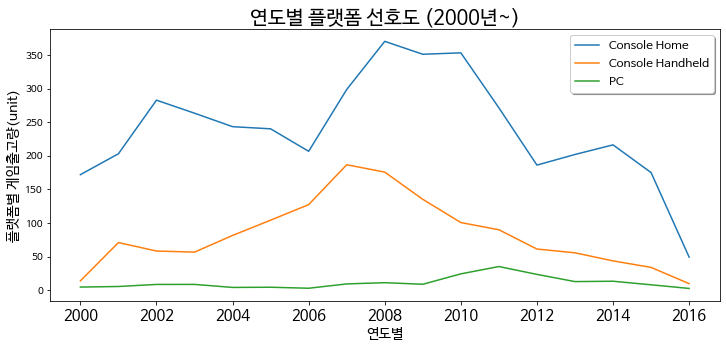

In [106]:
Yr_PC = Yr_Platform_type[Yr_Platform_type['Platform_Type']=='PC']
Yr_CS_Home = Yr_Platform_type[Yr_Platform_type['Platform_Type']=='CS Home']
Yr_CS_Handheld = Yr_Platform_type[Yr_Platform_type['Platform_Type']=='CS Handheld']

fig, ax = plt.subplots(figsize=(12,5))

plt.plot(Yr_CS_Home['Year'],Yr_CS_Home['Sales_Total'], label='Console Home')
plt.plot(Yr_CS_Handheld['Year'],Yr_CS_Handheld['Sales_Total'], label='Console Handheld')
plt.plot(Yr_PC['Year'],Yr_PC['Sales_Total'], label='PC')

plt.title("연도별 플랫폼 선호도 (2000년~)",fontsize = 20)
plt.xlabel('연도별',fontsize = 14)
plt.ylabel('플랫폼별 게임출고량(unit)',fontsize = 14)
plt.legend(loc='best', fontsize = 12, shadow=True)

plt.show()

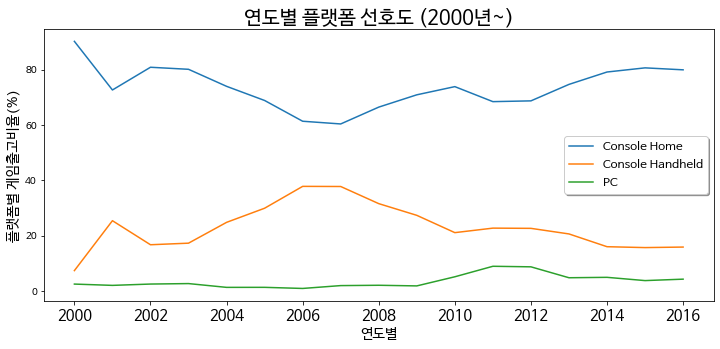

In [107]:
Yr_PC_ratio = Yr_pf_ratio[Yr_pf_ratio['Platform_Type']=='PC']
Yr_CS_Home_ratio = Yr_pf_ratio[Yr_pf_ratio['Platform_Type']=='CS Home']
Yr_CS_Handheld_ratio = Yr_pf_ratio[Yr_pf_ratio['Platform_Type']=='CS Handheld']

fig, ax = plt.subplots(figsize=(12,5))

plt.plot(Yr_CS_Home_ratio['Year'],Yr_CS_Home_ratio['Sales_Total_Ratio'], label='Console Home')
plt.plot(Yr_CS_Handheld_ratio['Year'],Yr_CS_Handheld_ratio['Sales_Total_Ratio'], label='Console Handheld')
plt.plot(Yr_PC_ratio['Year'],Yr_PC_ratio['Sales_Total_Ratio'], label='PC')

plt.title("연도별 플랫폼 선호도 (2000년~)",fontsize = 20)
plt.xlabel('연도별',fontsize = 14)
plt.ylabel('플랫폼별 게임출고비율(%)',fontsize = 14)
plt.legend(loc='best', fontsize = 12, shadow=True)

plt.show()

In [108]:
# 총량으로 표현한 이유 = 전체적인 판매추이를 조금 더 시각적으로 보기 위함
# 퍼센트로 확인한 이유 = 판매되는 게임의 각 플랫폼별 차이를 조금 더 시각적으로 보기 위함

[ 인기게임에 대한 분석 ]
- 연도별 장르선호도, 지역별 장르선호도 모두에서 압도적인 1위를 차지하고있는 Action 장르의 TOP3 list up 및 TOP2 분석


In [109]:
df['Sales_Total'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df_act = df[df['Genre']=='Action']
df_act = df_act.sort_values(by='Sales_Total', ascending = False).reset_index(drop=True)
df_act = df_act.head(5) # Action 에서도 top5 추출
df_act

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Total
0,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.32
1,Red Dead Redemption,X360,2010,Action,Take-Two Interactive,3.70,1.97,0.09,0.57,6.33
2,Metal Gear Solid 2: Sons of Liberty,PS2,2001,Action,Konami Digital Entertainment,2.45,2.01,0.87,0.72,6.05
3,LEGO Star Wars: The Complete Saga,Wii,2007,Action,LucasArts,3.66,1.63,0.00,0.53,5.82
4,Assassin's Creed III,X360,2012,Action,Ubisoft,3.13,1.71,0.03,0.44,5.31
